In [2]:
# 导入依赖
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 第一部分：用NumPy创建和处理数据

In [3]:
# 创建模拟数据：100名学生的数学、英语、物理成绩

In [4]:

np.random.seed(42)  # 确保结果可重现

# 生成正态分布的成绩数据
math_scores = np.random.normal(75, 12, 100)      # 均值75，标准差12
english_scores = np.random.normal(80, 10, 100)   # 均值80，标准差10
physics_scores = np.random.normal(70, 15, 100)   # 均值70，标准差15

# 合并成二维数组：每行代表一个学生，每列代表一门科目
scores = np.column_stack([math_scores, english_scores, physics_scores])

print(f"数据形状：{scores.shape}")  # (100, 3)
print(f"数据类型：{scores.dtype}")  # float64

数据形状：(100, 3)
数据类型：float64


In [5]:
# 二、简单数据操作
# 1. 条件筛选：找出数学成绩大于80的学生
high_math = scores[scores[:, 0] > 80]
print(f"数学成绩优秀的学生数量：{len(high_math)}")

# 2. 矢量运算：计算每个学生的总分
total_scores = np.sum(scores, axis=1)
print(f"平均总分：{np.mean(total_scores):.2f}")

# 3. 数组重塑：将数据转换为便于分析的形式
# 将100x3的成绩矩阵重塑为300x1的向量（用于后续统计）
all_scores_flat = scores.flatten()

数学成绩优秀的学生数量：25
平均总分：224.95


## 2、构建学生数据表：numpy转dataframe

In [6]:
# 将NumPy数组转换为DataFrame
student_data = pd.DataFrame({
    'student_id': range(1, 101),
    'math': scores[:, 0],
    'english': scores[:, 1],
    'physics': scores[:, 2]
})

# 添加衍生信息
student_data['total_score'] = student_data[['math', 'english', 'physics']].sum(axis=1)
student_data['average_score'] = student_data['total_score'] / 3

# 添加等级分类
def get_grade(avg_score):
    if avg_score >= 90:
        return 'A'
    elif avg_score >= 80:
        return 'B'
    elif avg_score >= 70:
        return 'C'
    else:
        return 'D'

student_data['grade'] = student_data['average_score'].apply(get_grade)

print(student_data.head())

   student_id       math    english    physics  total_score  average_score  \
0           1  80.960570  65.846293  75.366810   222.173673      74.057891   
1           2  73.340828  75.793547  78.411768   227.546143      75.848714   
2           3  82.772262  76.572855  86.245769   245.590886      81.863629   
3           4  93.276358  71.977227  85.807031   251.060616      83.686872   
4           5  72.190160  78.387143  49.334959   199.912262      66.637421   

  grade  
0     C  
1     C  
2     B  
3     B  
4     D  


## 3、核心的数据操作


In [7]:
# 1. 数据概览：快速了解数据分布
print("数据基本统计：")
print(student_data[['math', 'english', 'physics']].describe())

# 2. 分组分析：按等级分组查看人数分布
grade_distribution = student_data['grade'].value_counts()
print("\n等级分布：")
print(grade_distribution)

# 3. 条件筛选：找出需要重点关注的学生
struggling_students = student_data[student_data['average_score'] < 60]
print(f"\n需要关注的学生数量：{len(struggling_students)}")

# 4. 数据透视：分析科目间的关系
subject_correlation = student_data[['math', 'english', 'physics']].corr()
print("\n科目间相关性：")
print(subject_correlation)

数据基本统计：
             math     english     physics
count  100.000000  100.000000  100.000000
mean    73.753842   80.223046   70.973444
std     10.898021    9.536690   16.264243
min     43.563059   60.812288   21.380990
25%     67.789132   71.943395   60.168347
50%     73.476524   80.841072   71.465436
75%     79.871425   85.381704   80.566562
max     97.227338  107.201692  127.790972

等级分布：
grade
C    51
D    25
B    21
A     3
Name: count, dtype: int64

需要关注的学生数量：2

科目间相关性：
             math   english   physics
math     1.000000 -0.136422  0.190840
english -0.136422  1.000000 -0.036632
physics  0.190840 -0.036632  1.000000


## 1、实战演练：创建综合分析图表

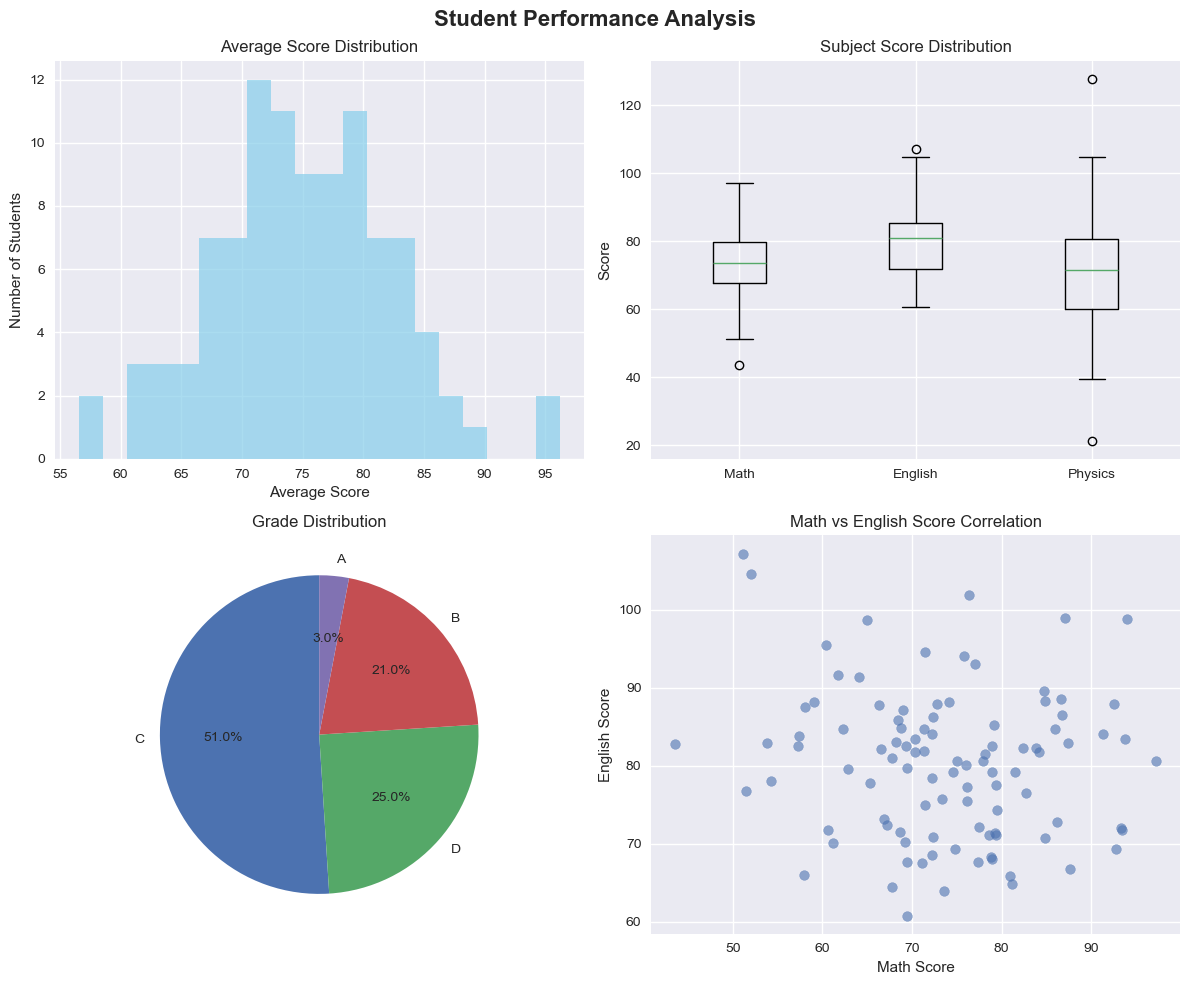

In [11]:
# 使用英文标签避免字体问题
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Student Performance Analysis', fontsize=16, fontweight='bold')

# 1. 成绩分布直方图
axes[0, 0].hist(student_data['average_score'], bins=20, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Average Score Distribution')
axes[0, 0].set_xlabel('Average Score')
axes[0, 0].set_ylabel('Number of Students')

# 2. 科目成绩对比箱线图
subject_data = [student_data['math'], student_data['english'], student_data['physics']]
axes[0, 1].boxplot(subject_data, tick_labels=['Math', 'English', 'Physics'])
axes[0, 1].set_title('Subject Score Distribution')
axes[0, 1].set_ylabel('Score')

# 3. 等级分布饼图
axes[1, 0].pie(grade_distribution.values, labels=grade_distribution.index,
               autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Grade Distribution')

# 4. 科目间相关性散点图
axes[1, 1].scatter(student_data['math'], student_data['english'], alpha=0.6)
axes[1, 1].set_xlabel('Math Score')
axes[1, 1].set_ylabel('English Score')
axes[1, 1].set_title('Math vs English Score Correlation')

plt.tight_layout()
plt.show()

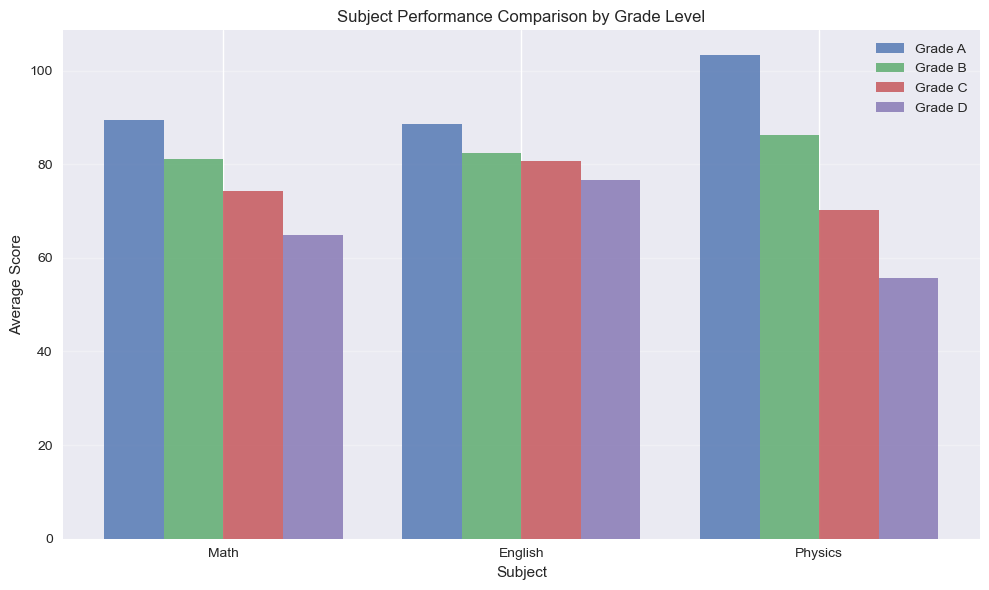

In [13]:
# 创建一个更深入的分析图表
fig, ax = plt.subplots(figsize=(10, 6))

# 按等级分组，展示不同等级学生的科目表现
grades = ['A', 'B', 'C', 'D']
subjects = ['math', 'english', 'physics']

# 计算各等级在各科目的平均分
grade_subject_avg = student_data.groupby('grade')[subjects].mean()

# 创建分组柱状图
x = np.arange(len(subjects))
width = 0.2

for i, grade in enumerate(grades):
    if grade in grade_subject_avg.index:
        values = grade_subject_avg.loc[grade]
        ax.bar(x + i * width, values, width, label=f'Grade {grade}', alpha=0.8)

ax.set_xlabel('Subject')
ax.set_ylabel('Average Score')
ax.set_title('Subject Performance Comparison by Grade Level')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(['Math', 'English', 'Physics'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()